In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.signal
import scipy.stats
import matplotlib.pyplot as plt
import mplhep
import pandas as pd

In [3]:
eu_df = pd.read_csv('152Eu.csv', skiprows=21)
bkg_df = pd.read_csv('bkg.csv', skiprows=21)

In [18]:
channels = eu_df['Channel'].to_numpy()
eu_counts = eu_df['Counts'].to_numpy()
bkg_counts = bkg_df['Counts'].to_numpy()

eu_counts -= bkg_counts
eu_counts = eu_counts / 1200

In [21]:
calibrationVals = [2.27306926, 56.76252822]
channels_calib = (channels - calibrationVals[1]) / calibrationVals[0]

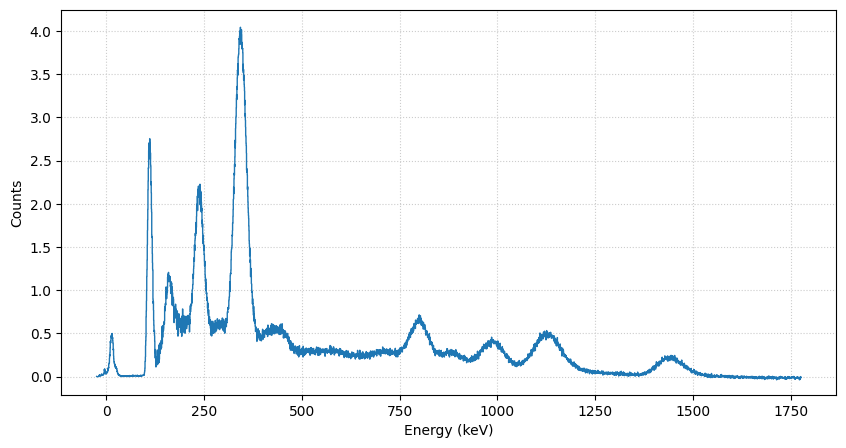

In [28]:
plt.figure(figsize=(10,5))
plt.hist(channels_calib, bins=channels_calib, weights=eu_counts, histtype='step')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid(color='#CCCCCC', linestyle=':')